In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2D plots

Parse data

In [53]:
x0 = 90
x1 = 290
y0 = -70
y1 = 70
ny,nx = (420, 600)
bathymetry = np.fromfile('../data/bathymetry',dtype='float64')[2:].reshape((ny,nx))
h0 = np.loadtxt('../calculations/tlab2D',delimiter=',',skiprows=1).reshape((ny,nx))
hmax = np.loadtxt('../calculations/tlab2D (1)',delimiter=',',skiprows=1).reshape((ny,nx))
arrivals = np.loadtxt('../calculations/tlab2D (2)',delimiter=',',skiprows=1).reshape((ny,nx))

x = np.linspace(x0,x1, bathymetry.shape[1])
y = np.linspace(y0,y1, bathymetry.shape[0])
x, y = np.meshgrid(x, y)



The big plot

[12.  8.]


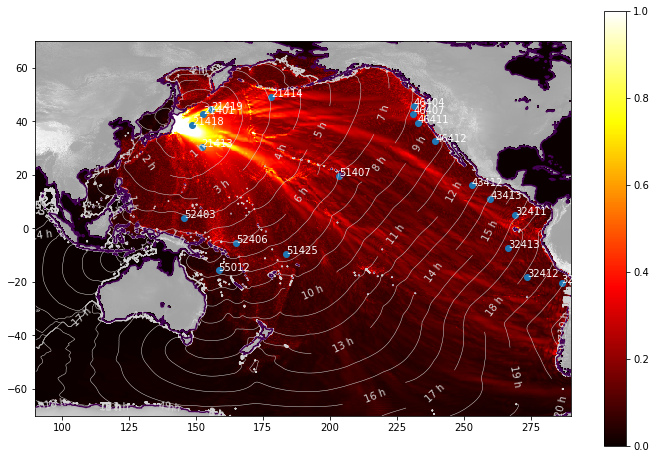

In [72]:
plt.pcolormesh(x,y,bathymetry,cmap = plt.cm.gray_r)
plt.pcolormesh(x,y,np.ma.masked_array(hmax, bathymetry<0), vmax=1, vmin=0.0, cmap = plt.cm.hot)
plt.colorbar()
c = plt.contour(x,y,arrivals/60/60, np.arange(0,24,1), linewidths=0.5, colors='lightgrey')
plt.clabel(c,fmt='%i h')


plt.contour(x,y,bathymetry,[0.0])

points = np.array([tseries[column]['location'] for column in tseries.columns])
plt.scatter(points[:,0],points[:,1])
    
for column in tseries.columns:
    plt.text(tseries[column]['location'][0],tseries[column]['location'][1],column,color='white')
plt.gca().set_aspect(1)
plt.gcf().set_size_inches(12,8)
print(plt.gcf().get_size_inches())

# Time series plots

In [2]:
DARTs = [21414, 21419, 21401, 21418, 21413, 52403, 52406, 55012, 51425, 51407,
        46404, 46407, 46411, 46412, 43412, 43413, 32411, 32412,32413,32401]

In [3]:
darts = {}
for dart in DARTs:
    darts[dart] = np.loadtxt('../data/tsunamiDART{}'.format(dart))

In [4]:
import pandas as pd

In [12]:
tseries = pd.read_json('../calculations//pois')
tseries

,21401,21413,21414,21418,21419,32401,32411,32412,32413,43412,43413,46404,46407,46411,46412,51407,51425,52403,52406,55012
closestDeepPoint,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
depth,5237,5991,5925,5664,5407,5090,3168,4379,4011,4369,3411,2761,3374,4365,3820,4752,4837,4261,1971,3238
location,"[152.583, 42.617]","[152.132, 30.533]","[178.219, 48.968]","[148.645, 38.727]","[155.717, 44.435]","[286.579, -20.474]","[269.12, 4.953]","[273.626, -17.984]","[266.483, -7.406]","[253.03300000000002, 16.045]","[259.91700000000003, 11.012]","[231.267, 45.853]","[231.168, 42.682]","[232.933, 39.333]","[239.437, 32.492]","[203.455, 19.57]","[183.68, -9.517]","[145.52, 4.02]","[164.977, -5.307]","[158.453, -15.664]"
pixel,"[187, 337]","[186, 301]","[264, 356]","[176, 325]","[197, 342]","[589, 148]","[536, 224]","[550, 156]","[529, 187]","[488, 258]","[509, 242]","[423, 347]","[423, 337]","[428, 327]","[448, 307]","[340, 268]","[281, 181]","[166, 222]","[225, 194]","[205, 163]"
shallowCorrectionFactor,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
surface,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.8286174432...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
time,"[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1...","[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 1..."


In [13]:
tseries.head()

,21401,21413,21414,21418,21419,32401,32411,32412,32413,43412,43413,46404,46407,46411,46412,51407,51425,52403,52406,55012
closestDeepPoint,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
depth,5237,5991,5925,5664,5407,5090,3168,4379,4011,4369,3411,2761,3374,4365,3820,4752,4837,4261,1971,3238
location,"[152.583, 42.617]","[152.132, 30.533]","[178.219, 48.968]","[148.645, 38.727]","[155.717, 44.435]","[286.579, -20.474]","[269.12, 4.953]","[273.626, -17.984]","[266.483, -7.406]","[253.03300000000002, 16.045]","[259.91700000000003, 11.012]","[231.267, 45.853]","[231.168, 42.682]","[232.933, 39.333]","[239.437, 32.492]","[203.455, 19.57]","[183.68, -9.517]","[145.52, 4.02]","[164.977, -5.307]","[158.453, -15.664]"
pixel,"[187, 337]","[186, 301]","[264, 356]","[176, 325]","[197, 342]","[589, 148]","[536, 224]","[550, 156]","[529, 187]","[488, 258]","[509, 242]","[423, 347]","[423, 337]","[428, 327]","[448, 307]","[340, 268]","[281, 181]","[166, 222]","[225, 194]","[205, 163]"
shallowCorrectionFactor,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


21414
21419
21401
21418
21413


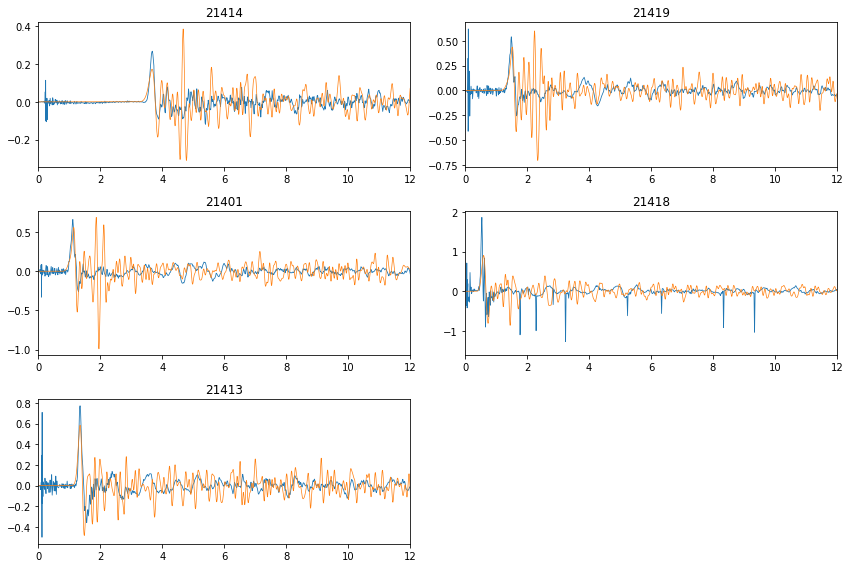

In [9]:
plt.figure(figsize=(12,8))
for i,dart in enumerate([21414,21419,21401,21418, 21413]):
    print(dart)
    plt.subplot(3,2,i+1)
    plt.plot(darts[dart][:,0]*24,darts[dart][:,1], '-', lw=0.8,ms=0.25,label='measurement')
    plt.plot(tlabPois.index/60/60, tlabPois['{}(m)'.format(dart)],'-',lw=0.7,ms=0.25,label='nami')    
    plt.title('{}'.format(dart))

    plt.xlim(0,12)
# plt.legend(loc=0)
plt.tight_layout()

52403
52406
55012
51407
51425


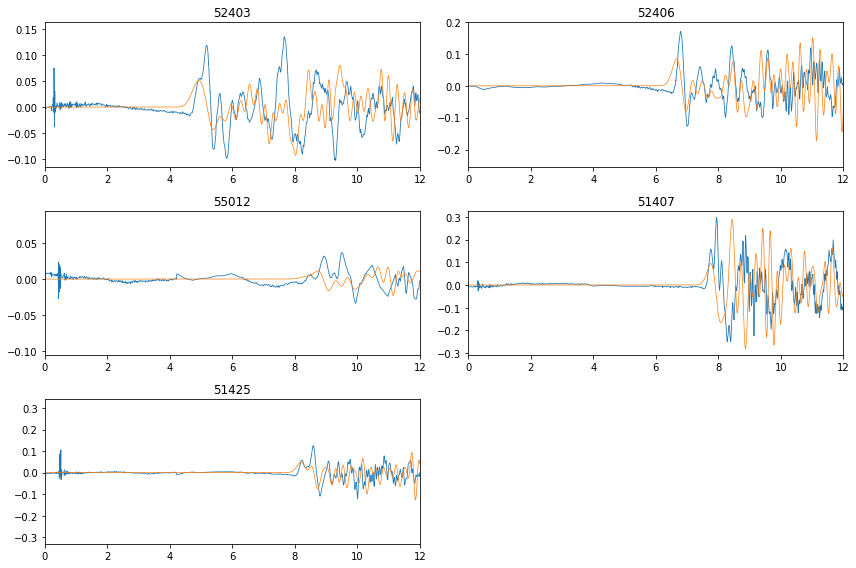

In [10]:
plt.figure(figsize=(12,8))
for i,dart in enumerate([52403,52406,55012,51407,51425]):
    print(dart)
    plt.subplot(3,2,i+1)
    plt.plot(darts[dart][:,0]*24,darts[dart][:,1], '-', lw=0.8,ms=0.25,label='measurement')
    plt.plot(tlabPois.index/60/60, tlabPois['{}(m)'.format(dart)],'-',lw=0.7,ms=0.25,label='nami')    
    plt.title('{}'.format(dart))

    plt.xlim(0,12)
# plt.legend(loc=0)
plt.tight_layout()

46404
46407
46411
46412
43412
43413


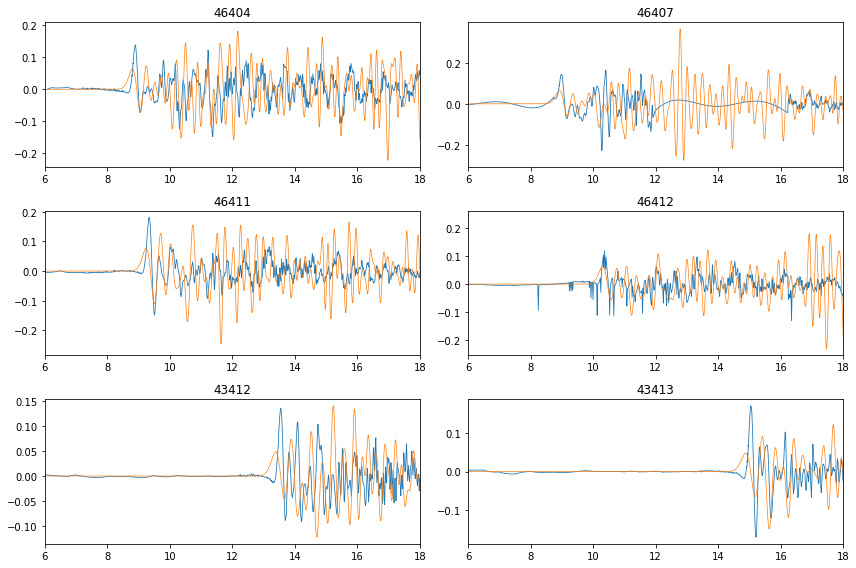

In [11]:
plt.figure(figsize=(12,8))
for i,dart in enumerate([46404,46407,46411,46412,43412,43413]):
    print(dart)
    plt.subplot(3,2,i+1)
    plt.plot(darts[dart][:,0]*24,darts[dart][:,1], '-', lw=0.8,ms=0.25,label='measurement')
    plt.plot(tlabPois.index/60/60, tlabPois['{}(m)'.format(dart)],'-',lw=0.7,ms=0.25,label='nami')    
    plt.title('{}'.format(dart))

    plt.xlim(6,18)
# plt.legend(loc=0)
plt.tight_layout()

32411
32412
32413
32401


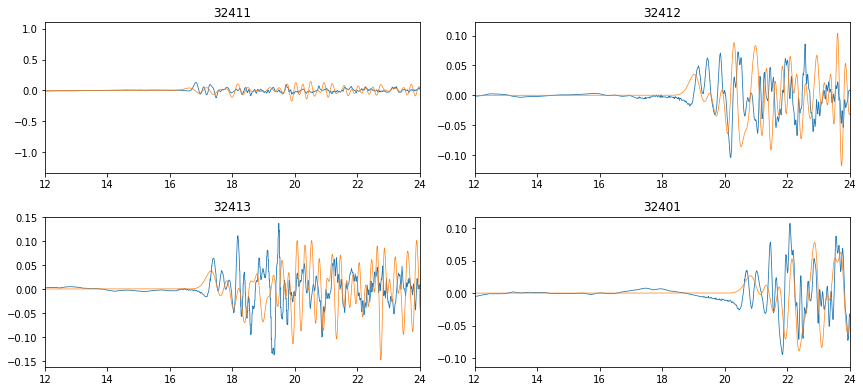

In [12]:
plt.figure(figsize=(12,8))
for i,dart in enumerate([32411,32412,32413,32401]):
    print(dart)
    plt.subplot(3,2,i+1)
    plt.plot(darts[dart][:,0]*24,darts[dart][:,1], '-', lw=0.8,ms=0.25,label='measurement')
    plt.plot(tlabPois.index/60/60, tlabPois['{}(m)'.format(dart)],'-',lw=0.7,ms=0.25,label='nami')    
    plt.title('{}'.format(dart))

    plt.xlim(12,24)
# plt.legend(loc=0)
plt.tight_layout()